# Titanic Project

### Problem Statement:
The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.to_csv('titanic_train.csv', index = False)

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/arjun0200/Datasets/main/titanic_train.csv")
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
91,92,0,3,"Andreasson, Mr. Paul Edvin",male,20.0,0,0,347466,7.8542,NaN,S
289,290,1,3,"Connolly, Miss. Kate",female,22.0,0,0,370373,7.7500,NaN,Q
651,652,1,2,"Doling, Miss. Elsie",female,18.0,0,1,231919,23.0000,NaN,S
478,479,0,3,"Karlsson, Mr. Nils August",male,22.0,0,0,350060,7.5208,NaN,S


In [12]:
df.shape

(891, 12)

In [13]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

From above code we find that data types of different columns dataset

In [14]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

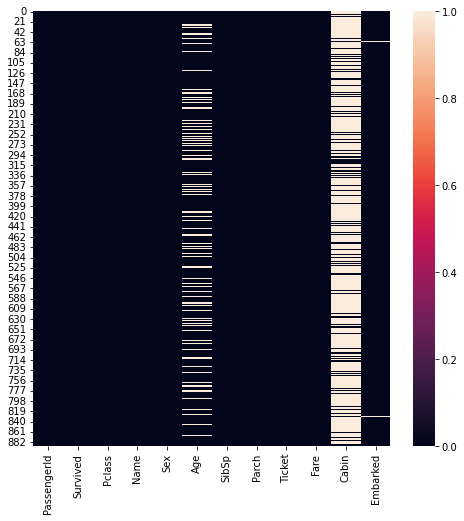

In [15]:
plt.figure(figsize = (8,8))
sns.heatmap(df.isnull())
plt.show()

From above code we can see null values visually and find out that dataset Age having 177 null values, cabin having 687 null values and Embarked having 2 null values

In [16]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [17]:
pd.set_option("max_rows", None)

## Data Cleansing

### Checking Unique values of the dataset

In [18]:
df.Ticket.unique().shape

(681,)

In [19]:
df.Name.unique().shape

(891,)

In [20]:
print(df.Embarked.unique())
print(df.Embarked.unique().shape)

['S' 'C' 'Q' nan]
(4,)


## From above uniqueness data we find that there are no relation between ticketTand names of the customer with respect to survive passengers.

Hence we can remove it for better model assumptions.

## Removing Cabin columns dataset as it having so many null values and are independent to the other parameters 

In [21]:
df.drop(["Name", "Ticket", "Cabin"], inplace = True, axis = 1)

In [22]:
df.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


### Filling NaN values of Passengers age with the age mean of the passengers

In [23]:
df['Age'] = df.Age.fillna(df.Age.mean())

In [24]:
df.Age.isnull().sum()    # checking null values 

0

### Filling NaN values of Embarked  with the highest Embarked values (i.e mode) of the passengers

In [25]:
df.Embarked = df.Embarked.fillna(df.Embarked.mode()[0])

In [26]:
df.Embarked.isnull().sum()

0

### After filling all values checking again data frame of null values

In [27]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

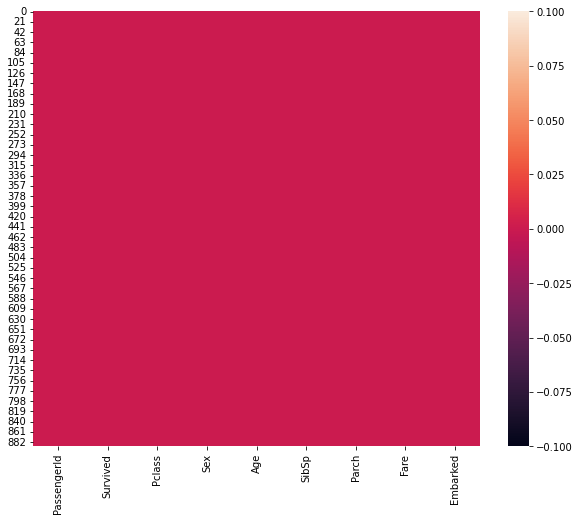

In [28]:
plt.figure(figsize = (10,8))
sns.heatmap(df.isnull())
plt.show()

### As we know that ages are integer numbers but in dataset its datatype updated as float type hence we need to convert it to integer

In [29]:
df.Age = df.Age.astype(int)
df.Age.dtype

dtype('int32')

In [30]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age              int32
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

### Checking columns with uniqueness and converting them into ordinal form for better data analysis assumptions

In [31]:
print(df.Survived.unique())
print(df.Pclass.unique())
print(df.Sex.unique())
print(df.Embarked.unique())

[0 1]
[3 1 2]
['male' 'female']
['S' 'C' 'Q']


#### As we find that Sex and Embarked having 2 or 3 unique values respectively with object data type hence we need to convert it into ordinal form

In [32]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = enc.fit_transform(df[i].values.reshape(-1,1))

In [33]:
print(df.Sex.unique())
print(df.Embarked.unique())   # Now object columns are converted to liable dataset

[1. 0.]
[2. 0. 1.]


In [34]:
df.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1.0,22,1,0,7.2500,2.0
1,2,1,1,0.0,38,1,0,71.2833,0.0
2,3,1,3,0.0,26,0,0,7.9250,2.0
3,4,1,1,0.0,35,1,0,53.1000,2.0
4,5,0,3,1.0,35,0,0,8.0500,2.0


In [35]:
df_new = pd.DataFrame
df_new = df[['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked', 'Survived']]

In [36]:
df_new

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,3,1.0,22,1,0,7.2500,2.0,0
1,2,1,0.0,38,1,0,71.2833,0.0,1
2,3,3,0.0,26,0,0,7.9250,2.0,1
3,4,1,0.0,35,1,0,53.1000,2.0,1
4,5,3,1.0,35,0,0,8.0500,2.0,0
5,6,3,1.0,29,0,0,8.4583,1.0,0
6,7,1,1.0,54,0,0,51.8625,2.0,0
7,8,3,1.0,2,3,1,21.0750,2.0,0
8,9,3,0.0,27,0,2,11.1333,2.0,1
9,10,2,0.0,14,1,0,30.0708,0.0,1


In [37]:
df_new.dtypes

PassengerId      int64
Pclass           int64
Sex            float64
Age              int32
SibSp            int64
Parch            int64
Fare           float64
Embarked       float64
Survived         int64
dtype: object

In [38]:
df_new.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,0.647587,29.544332,0.523008,0.381594,32.204208,1.536476,0.383838
std,257.353842,0.836071,0.477990,13.013778,1.102743,0.806057,49.693429,0.791503,0.486592
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000,0.000000
50%,446.000000,3.000000,1.000000,29.000000,0.000000,0.000000,14.454200,2.000000,0.000000
75%,668.500000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000,1.000000
max,891.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000,1.000000


### Dividing dataset into categoricals values for understanding

In [39]:
df_categoricals = df_new[['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Survived']]

### Checking how much portion obtain by different categorical variables

In [40]:
import squarify

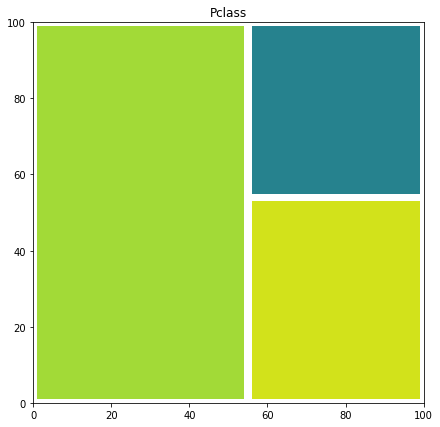

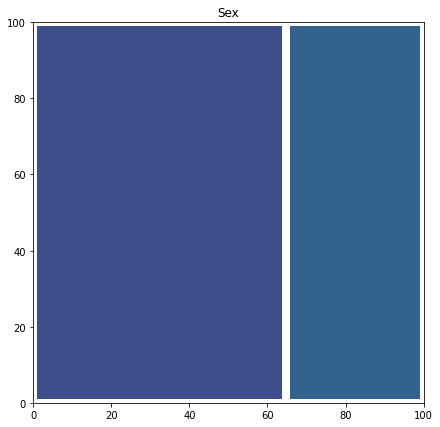

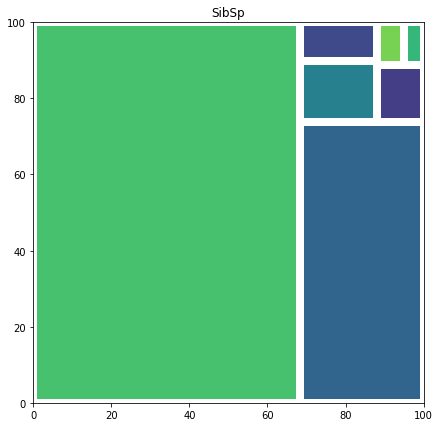

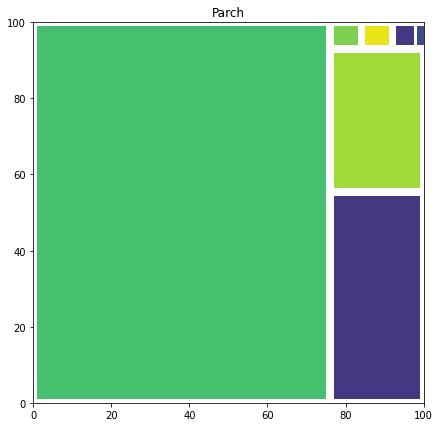

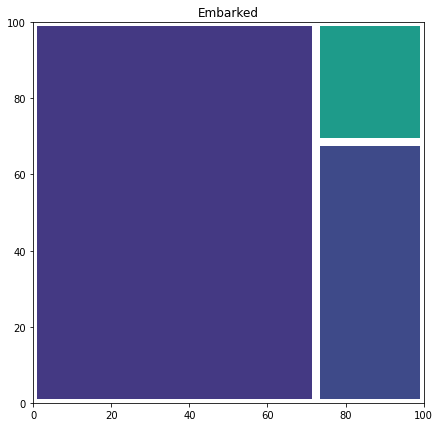

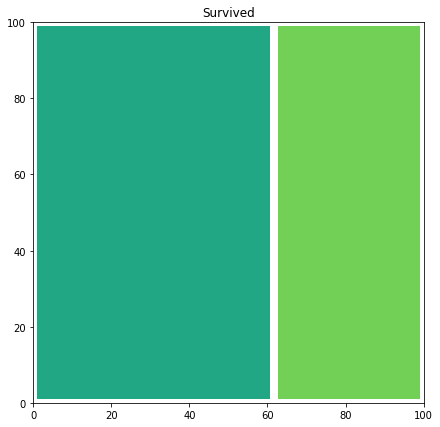

In [37]:
for i in df_categoricals:
    plt.figure(figsize = (7,7))
    squarify.plot(df_categoricals[i].value_counts(), pad = True)
    plt.title(i)
    plt.show()

### Checking Male and female passengers in titanic ship

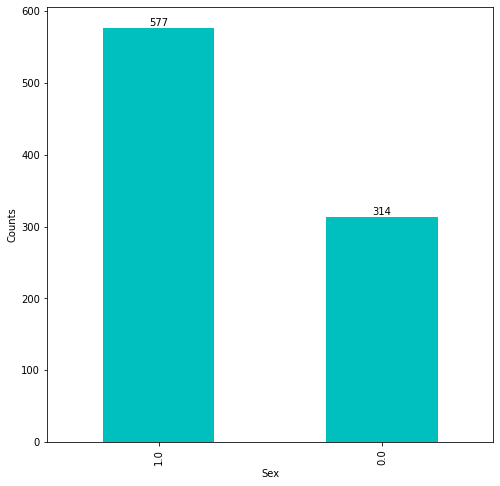

In [38]:
sex = df_categoricals['Sex'].value_counts()
plt.figure(figsize = (8,8))
df_sex = sex.plot(kind = 'bar', color = 'c')
df_sex.set_xlabel("Sex")
df_sex.set_ylabel("Counts")

for i in df_sex.containers:
    df_sex.bar_label(i)

#### From above code we find that male passengers are 577  and rest 314 are female passengers

#### 

### Pclass are the dataset which gives information about the passengers class likewise first class second class and third class

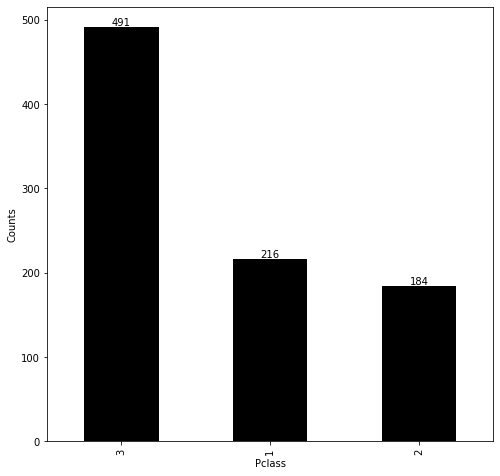

In [39]:
Pclass = df_categoricals['Pclass'].value_counts()
plt.figure(figsize = (8,8))
df_Pclass = Pclass.plot(kind = 'bar', color = 'k')
df_Pclass.set_xlabel("Pclass")
df_Pclass.set_ylabel("Counts")

for i in df_Pclass.containers:
    df_Pclass.bar_label(i)

### From above code we find that 1st pclass having 216 , 2nd pclass having 184 and 3rd pclass having 491 passengers in the ship

#### 

### SibSP gives information about the siblings/spouse in the ship means how much family members are present with them

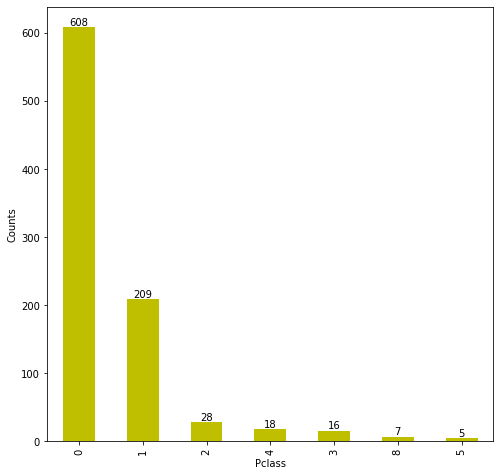

In [40]:
SibSp = df_categoricals['SibSp'].value_counts()
plt.figure(figsize = (8,8))
df_SibSp = SibSp.plot(kind = 'bar', color = 'y')
df_SibSp.set_xlabel("Pclass")
df_SibSp.set_ylabel("Counts")

for i in df_SibSp.containers:
    df_SibSp.bar_label(i)

#### From above code we find 

0    608  with no siblings

1      209 family having 1 siblings/spouse

2       28 family having 2 siblings/spouse

4       18 family having 4 siblings/spouse

3       16 family having 3 siblings/spouse

8       7 family having 8 siblings/spouse

5       5 family having 5 siblings/spouse

### Parch gives information regarding Number of Parents/Children Aboard

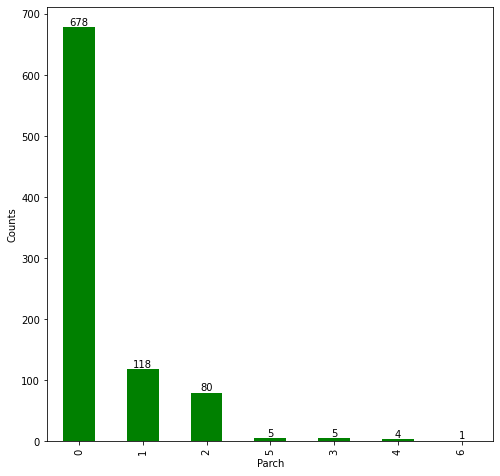

In [41]:
Parch = df_categoricals['Parch'].value_counts()
plt.figure(figsize = (8,8))
df_Parch = Parch.plot(kind = 'bar', color = 'g')
df_Parch.set_xlabel("Parch")
df_Parch.set_ylabel("Counts")

for i in df_Parch.containers:
    df_Parch.bar_label(i)

#### From above code we find that

   678  are individual parents

    118  having 1 children with them

     80  having 2 children

     5  having 5 children

      5  having 3 children

      4  having 4 children

      1  having 6 children

### Embarked implies where the traveler mounted from. There are three possible values for Embark — Southampton, Cherbourg, and Queenstown.

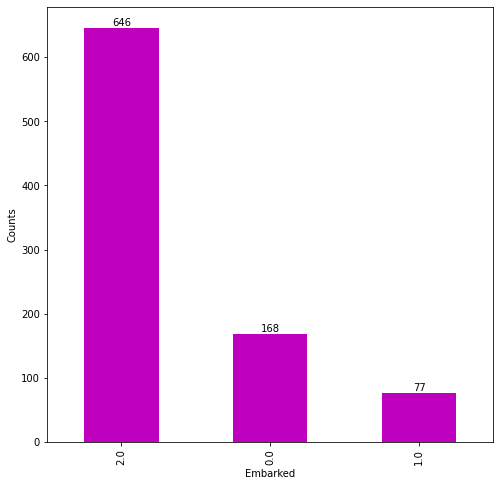

In [42]:
Embarked = df_categoricals['Embarked'].value_counts()
plt.figure(figsize = (8,8))
df_Embarked = Embarked.plot(kind = 'bar', color = 'm')
df_Embarked.set_xlabel("Embarked")
df_Embarked.set_ylabel("Counts")

for i in df_Embarked.containers:
    df_Embarked.bar_label(i)

#### More than 70% of the people boarded from Southampton. Just under 20% boarded from Cherbourg and the rest boarded from Queenstown

#### 

### Survived Passengers

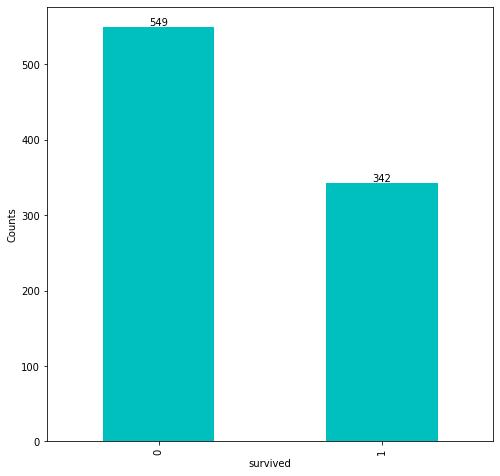

In [43]:
survived = df_categoricals['Survived'].value_counts()
plt.figure(figsize = (8,8))
df_survived = survived.plot(kind = 'bar', color = 'c')
df_survived.set_xlabel("survived")
df_survived.set_ylabel("Counts")

for i in df_survived.containers:
    df_survived.bar_label(i)

#### From above code we find that 549 passengers are not survived rest 342 are survived

#### 

### Checking percentage of categorical dataset in form of PIE CHARTS

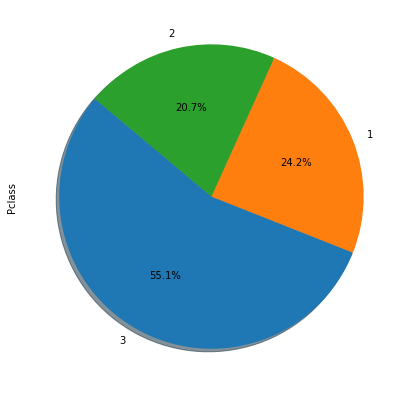

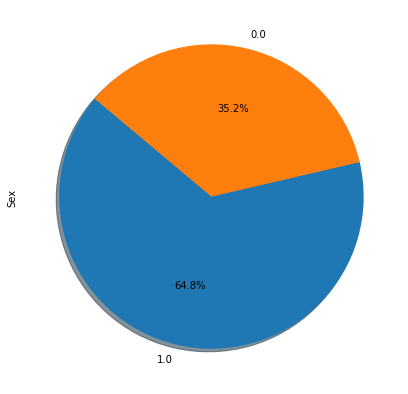

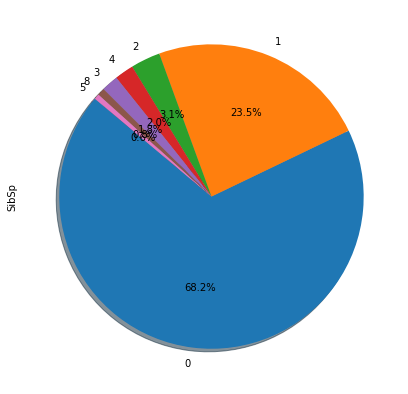

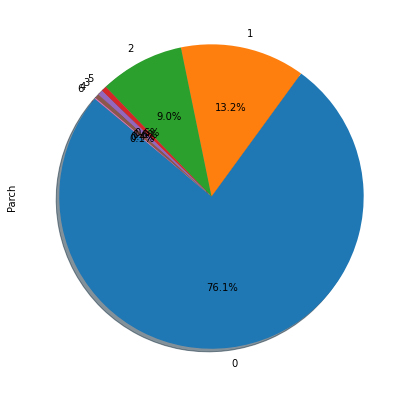

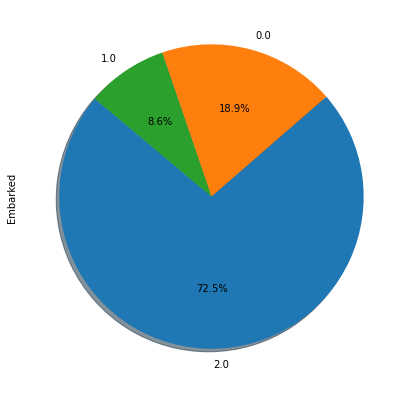

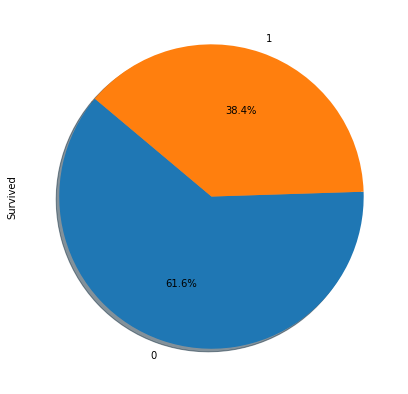

In [44]:
for i in df_categoricals:
    plt.figure(figsize = (7,7))
    df_categoricals[i].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', shadow=True, startangle=140)
    plt.show()

## Observations

From above code we find that 1st ,2nd and 3rd Pclass having ratio 20.7, 24.2 and 55.1 percentage respectively.

We find that male passengers are 64.8 percentage  and rest 35.2 percentage are female passengers.

More than 70% of the people boarded from Southampton. Just under 20% boarded from Cherbourg and the rest boarded from Queenstown.

From above code we find that 61.6 %  passengers are not survived rest 38.4 % are survived.

## Checking graph horizontally in a single scale

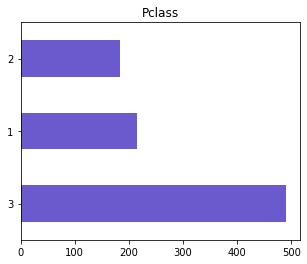

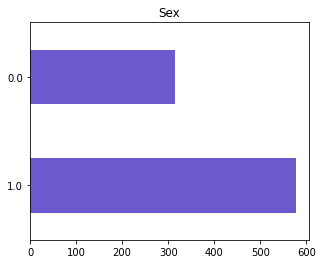

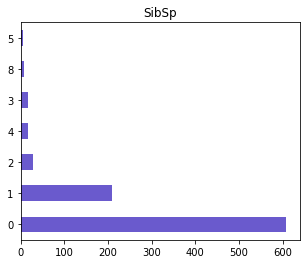

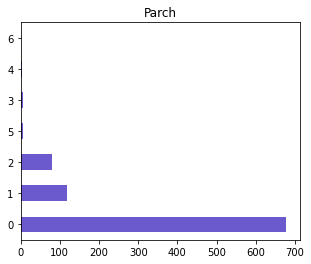

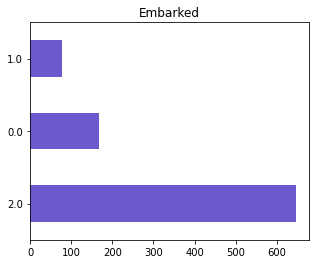

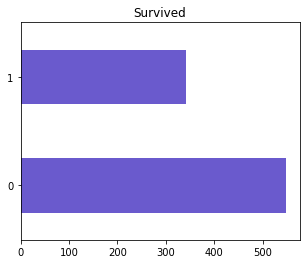

In [45]:
for i in df_categoricals:
    plt.figure(figsize = (5,4))
    df_categoricals[i].value_counts().plot(kind = 'barh', color = 'slateblue')
    plt.title(i)
    plt.show()
    

#### 

#### 

## Checking which ages people are residing in the ship

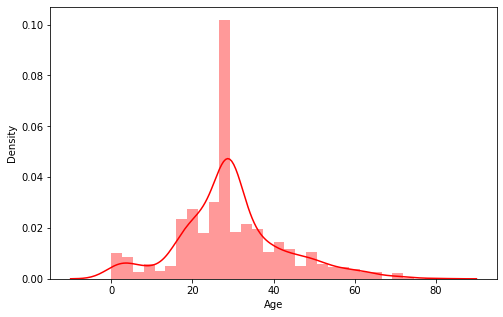

In [46]:
plt.figure(figsize = (8,5))
sns.distplot(df_new['Age'], color = 'red')
plt.show()

### From above code we find that mostly passengers ages are lies between 20 to 40 

#### 

#### Checking exactly which ages passengers are residing more

<Figure size 576x360 with 0 Axes>

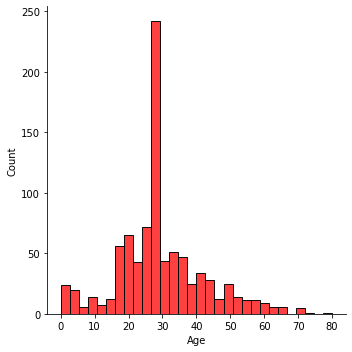

In [47]:
plt.figure(figsize = (8,5))
sns.displot(df_new['Age'], color = 'red')
plt.show()

### From above code we find that most of the age portion are in between 28 to 30 ages

#### 

## Checking fares of the passengers

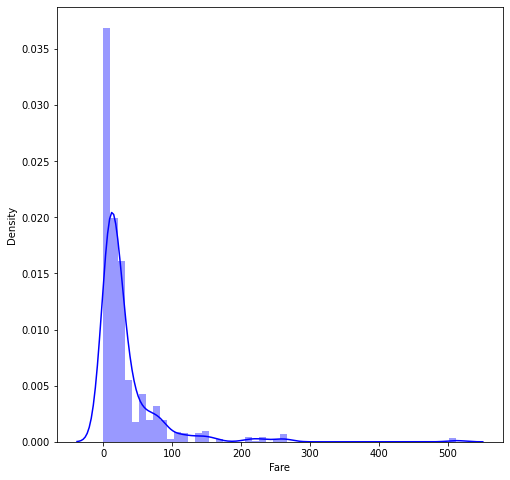

In [48]:
plt.figure(figsize = (8,8))
sns.distplot(df_new['Fare'], color = 'blue')
plt.show()

#### From above code we find that 70 percent of the passengers pays fares between range 10 to 80 dollars

## Scatter plot

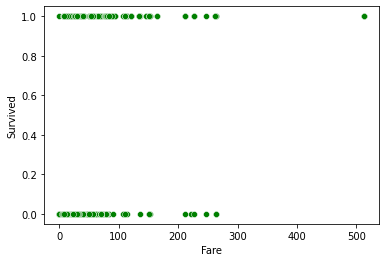

In [49]:
sns.scatterplot(x = 'Fare', y = 'Survived', data = df_new, color = 'g')
plt.show()

From above plot we can say that paying less fare passengers are not survived

## Strip/Swarmplot

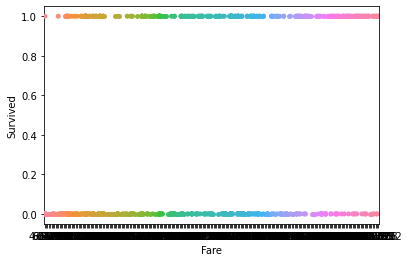

In [50]:
sns.stripplot(x = 'Fare', y = 'Survived', data = df_new)
plt.show()

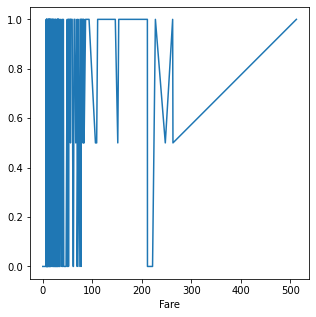

In [51]:
plt.figure(figsize = (5,5))
df_new.groupby('Fare')['Survived'].median().plot()
plt.show()

from above graph we can say that highest fare prices pays in the range between 0 to 100 

### Violin Plot

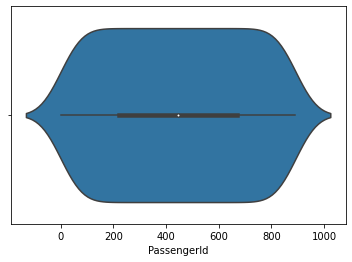

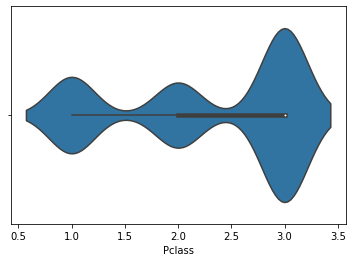

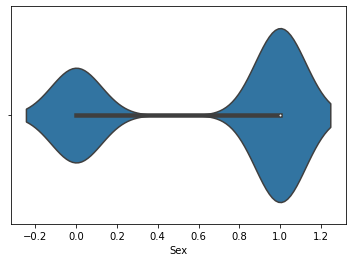

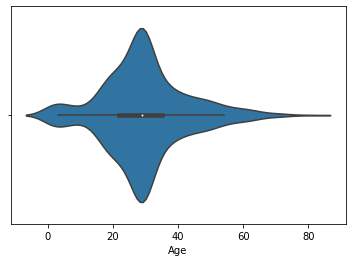

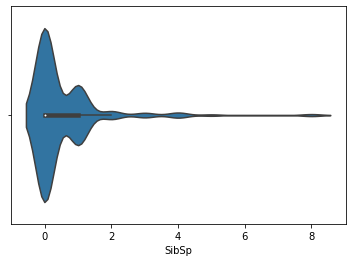

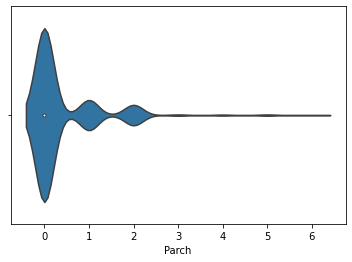

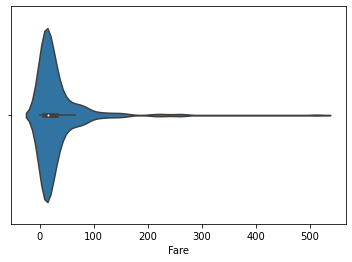

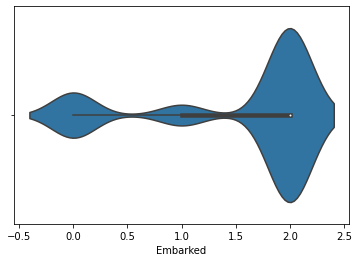

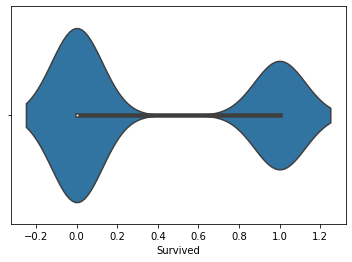

In [52]:
for i in df_new.columns:
    plt.figure()
    sns.violinplot(df[i], data = df_new)
    plt.show()

### Checking how data spreaded upto which range

#### 

## Histogram

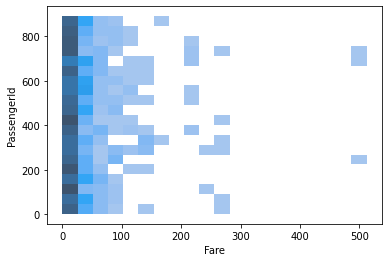

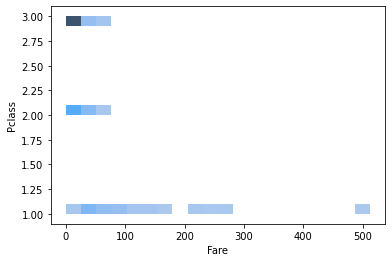

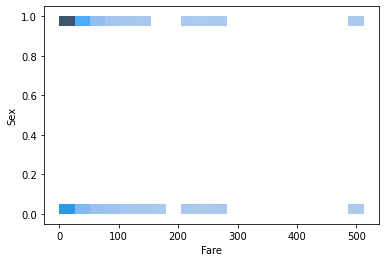

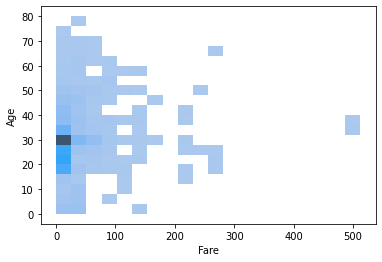

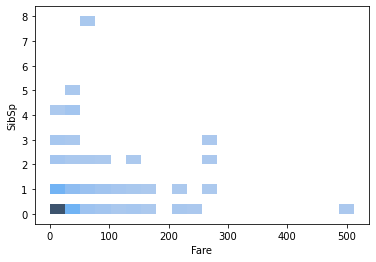

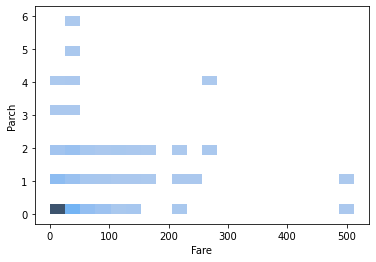

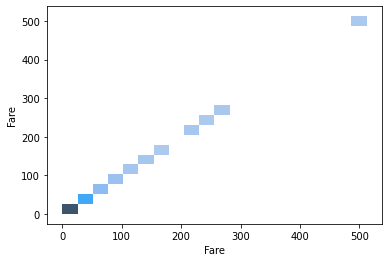

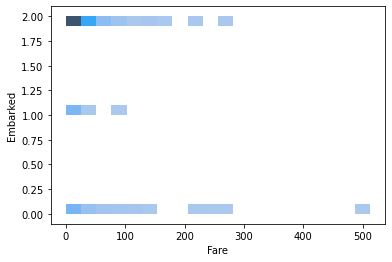

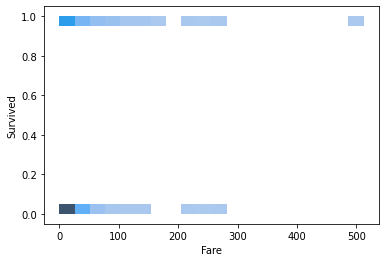

In [53]:
for i in df_new.columns:
    plt.figure()
    sns.histplot(x = df_new['Fare'], y = df_new[i],  bins = 20)
    plt.show()

### Checking data seperancy along with their variables

#### 

### Checking outliers

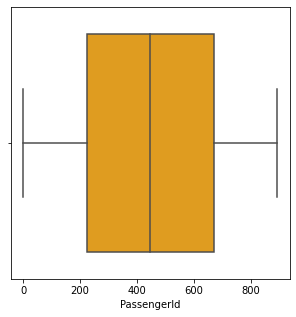

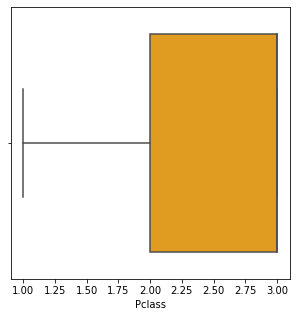

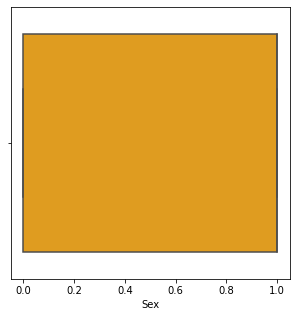

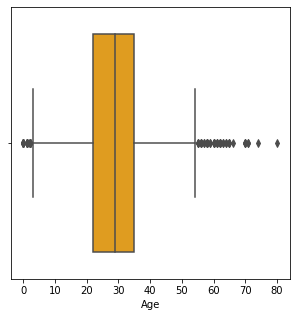

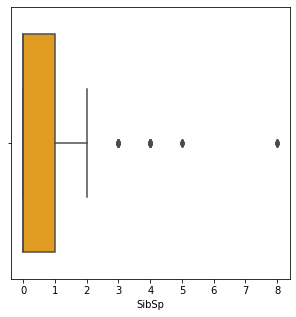

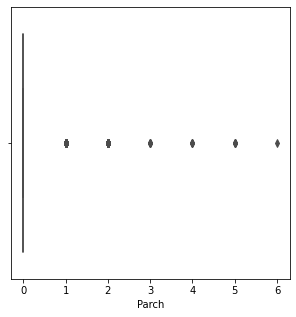

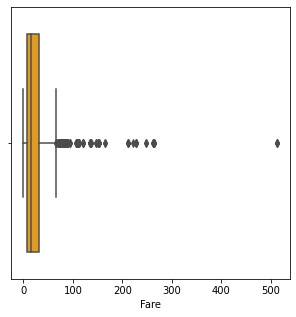

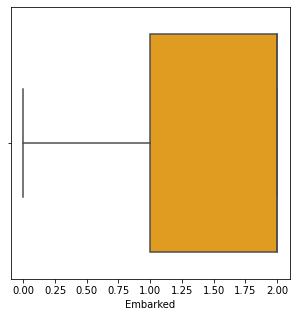

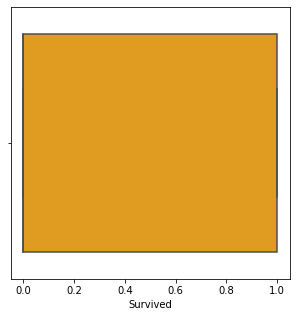

In [54]:
for i in df_new.columns:
    plt.figure(figsize = (5,5))
    sns.boxplot(df_new[i], orient='v', color='orange',)

### From above code we find that Age, SibSp, Parch and Fare having outliers in the dataset

#### 

## Checking Skewness

In [55]:
df_new.skew()

PassengerId    0.000000
Pclass        -0.630548
Sex           -0.618921
Age            0.459563
SibSp          3.695352
Parch          2.749117
Fare           4.787317
Embarked      -1.264823
Survived       0.478523
dtype: float64

<Figure size 72x36 with 0 Axes>

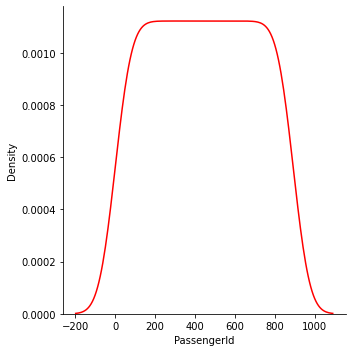

<Figure size 72x36 with 0 Axes>

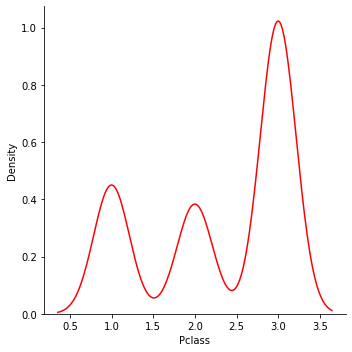

<Figure size 72x36 with 0 Axes>

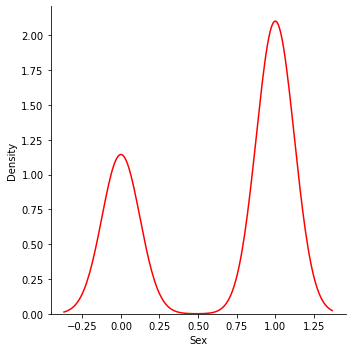

<Figure size 72x36 with 0 Axes>

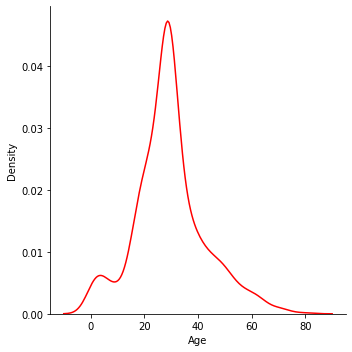

<Figure size 72x36 with 0 Axes>

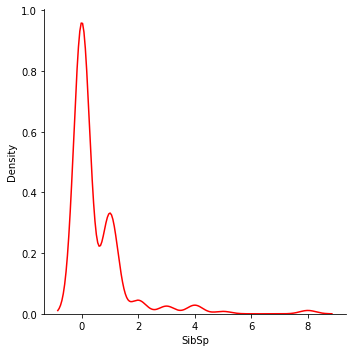

<Figure size 72x36 with 0 Axes>

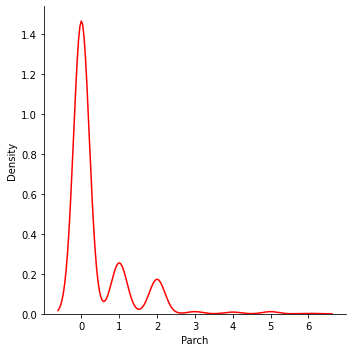

<Figure size 72x36 with 0 Axes>

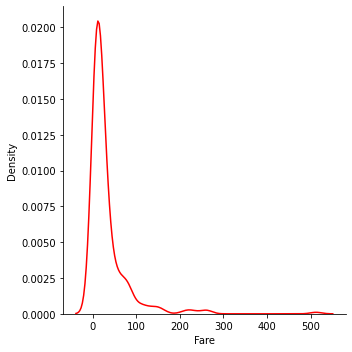

<Figure size 72x36 with 0 Axes>

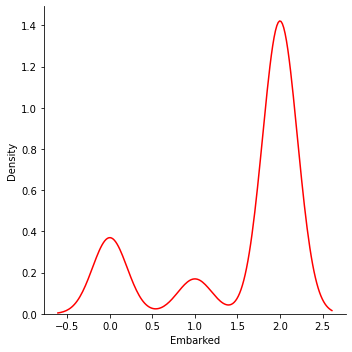

<Figure size 72x36 with 0 Axes>

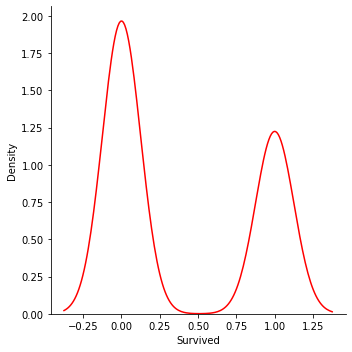

In [56]:
for i in df_new.columns:
    plt.figure(figsize = (1,0.5))
    sns.displot(df_new[i], kind = 'kde', color = 'red')

Pclass, Sex, Embarked having left skewed dataset.

Age, SibSp, Parch, Fare and Survived having right skewed dataset.


#### 

### Checking distributions of the dataset

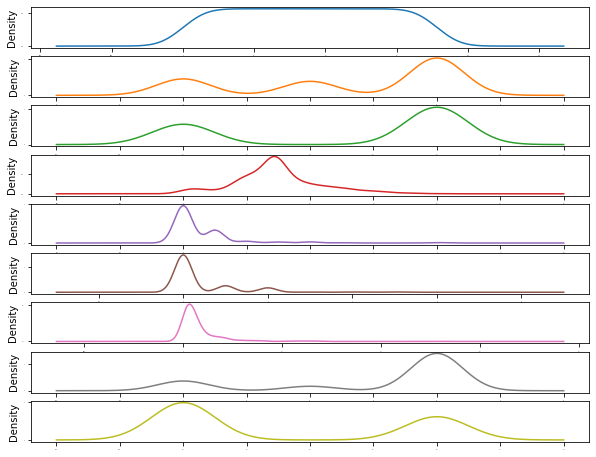

In [57]:
df_new.plot(kind = 'density', subplots = True, sharex = False, legend = False, figsize = (10,8), fontsize = 1)
plt.show()

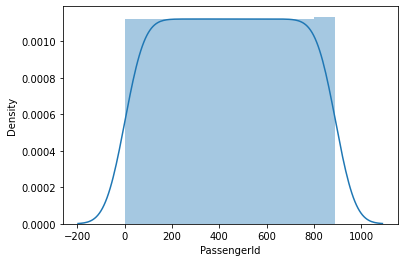

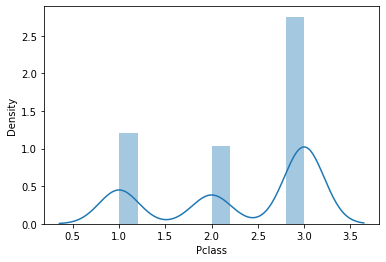

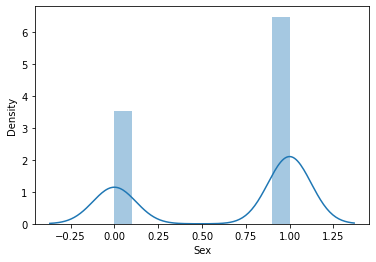

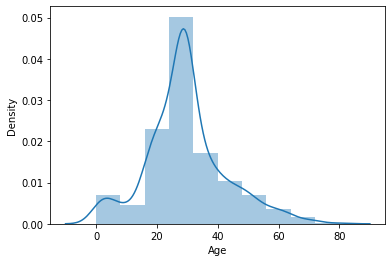

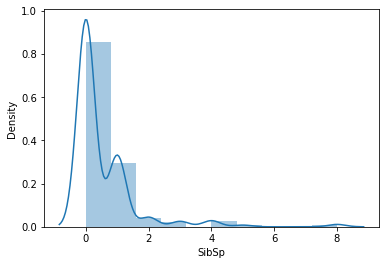

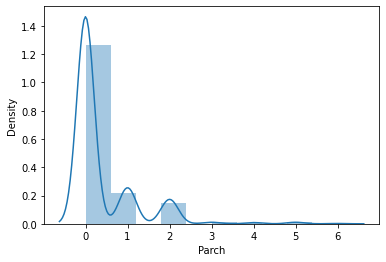

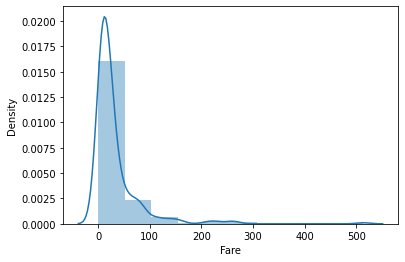

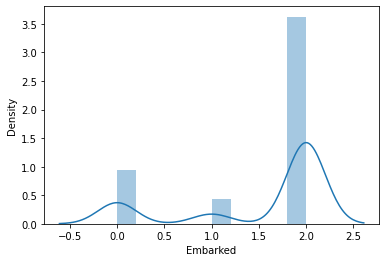

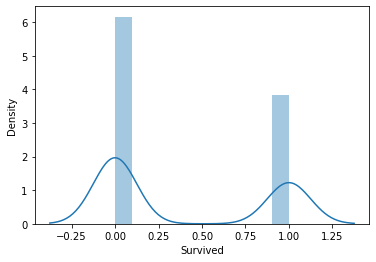

In [58]:
for i in df_new.columns:
    plt.figure()
    sns.distplot(df_new[i], bins = 10)

## Pairplot to check dataset in a single glimpse

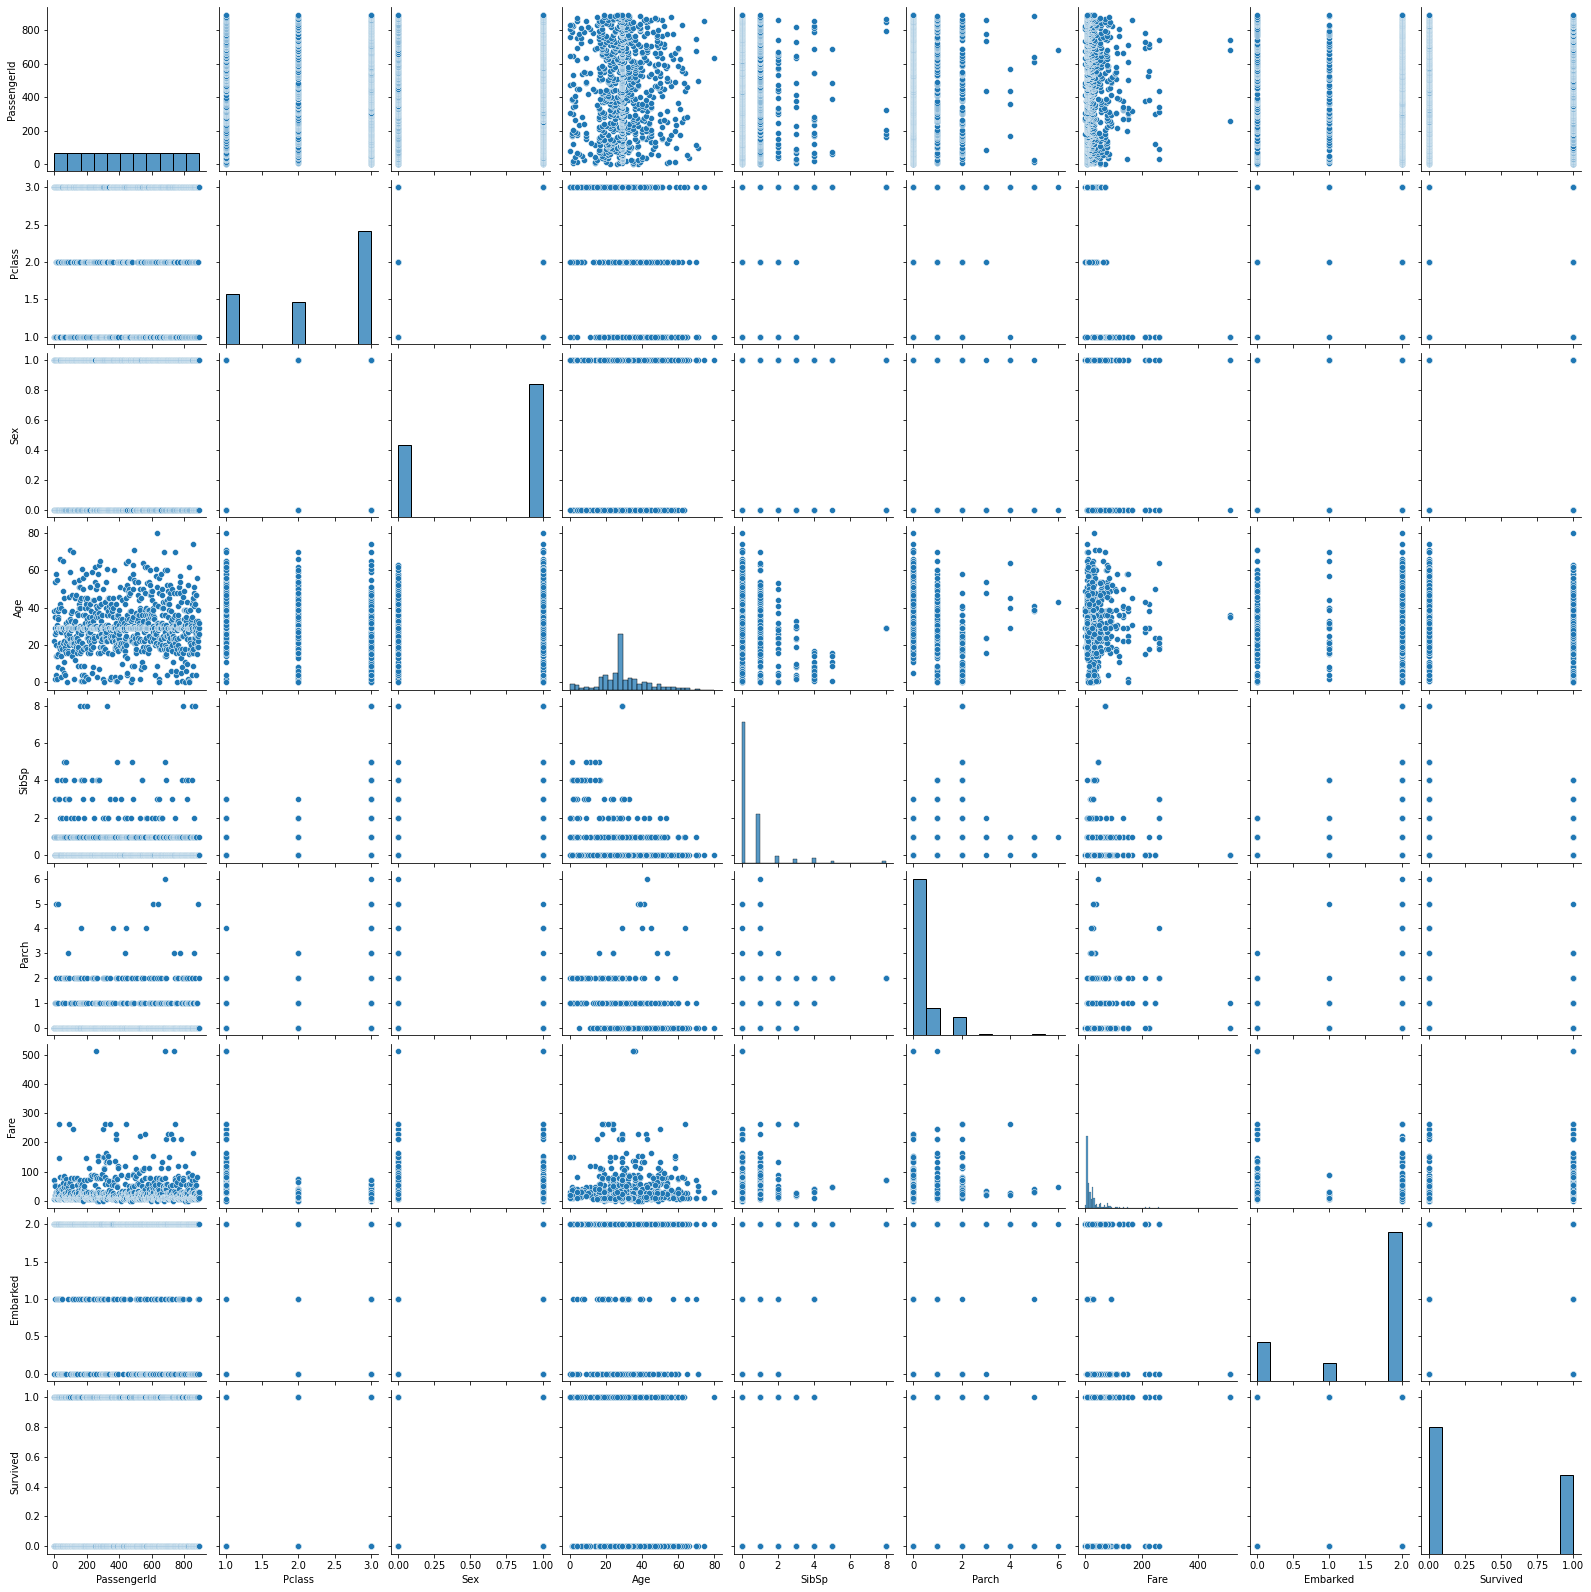

In [59]:
sns.pairplot(df_new)

## Checking correlation of the dataset

In [41]:
df_new.corr()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
PassengerId,1.000000,-0.035144,0.042939,0.033741,-0.057527,-0.001652,0.012658,0.013128,-0.005007
Pclass,-0.035144,1.000000,0.131900,-0.335071,0.083081,0.018443,-0.549500,0.162098,-0.338481
Sex,0.042939,0.131900,1.000000,0.082533,-0.114631,-0.245489,-0.182333,0.108262,-0.543351
Age,0.033741,-0.335071,0.082533,1.000000,-0.232743,-0.176744,0.093856,-0.022928,-0.067809
SibSp,-0.057527,0.083081,-0.114631,-0.232743,1.000000,0.414838,0.159651,0.068230,-0.035322
Parch,-0.001652,0.018443,-0.245489,-0.176744,0.414838,1.000000,0.216225,0.039798,0.081629
Fare,0.012658,-0.549500,-0.182333,0.093856,0.159651,0.216225,1.000000,-0.224719,0.257307
Embarked,0.013128,0.162098,0.108262,-0.022928,0.068230,0.039798,-0.224719,1.000000,-0.167675
Survived,-0.005007,-0.338481,-0.543351,-0.067809,-0.035322,0.081629,0.257307,-0.167675,1.000000


<AxesSubplot:>

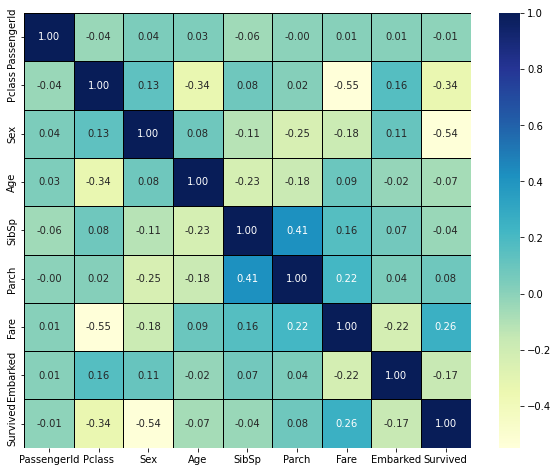

In [61]:
plt.figure(figsize = (10,8))
sns.heatmap(df_new.corr(), annot = True, fmt = ".2f", linecolor='black', linewidths='1', cmap="YlGnBu")

#### Here we find that there are some negative correlation in the dataset

## Checking negative and positive correlation visually

<AxesSubplot:>

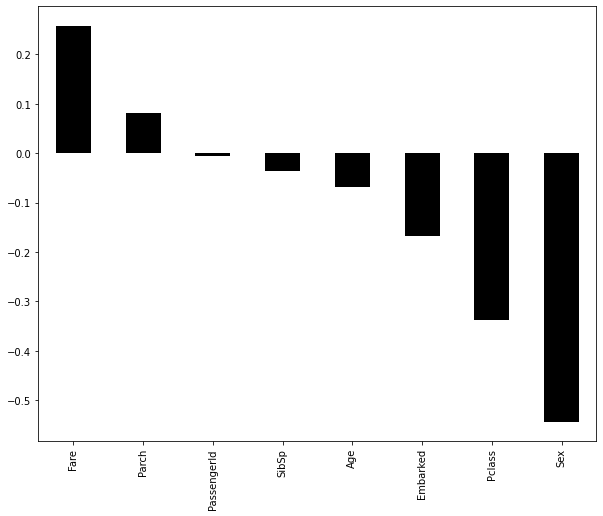

In [62]:
plt.figure(figsize = (10,8))
df_new.corr()['Survived'].sort_values(ascending = False).drop(['Survived']).plot(kind = 'bar', color = 'k')

### From above visualization we find that Fare and parch having positive correlation rest dataset having negative correlation with the datset

### Describe

In [63]:
df_new.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,0.647587,29.544332,0.523008,0.381594,32.204208,1.536476,0.383838
std,257.353842,0.836071,0.477990,13.013778,1.102743,0.806057,49.693429,0.791503,0.486592
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000,0.000000
50%,446.000000,3.000000,1.000000,29.000000,0.000000,0.000000,14.454200,2.000000,0.000000
75%,668.500000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000,1.000000
max,891.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000,1.000000


<AxesSubplot:>

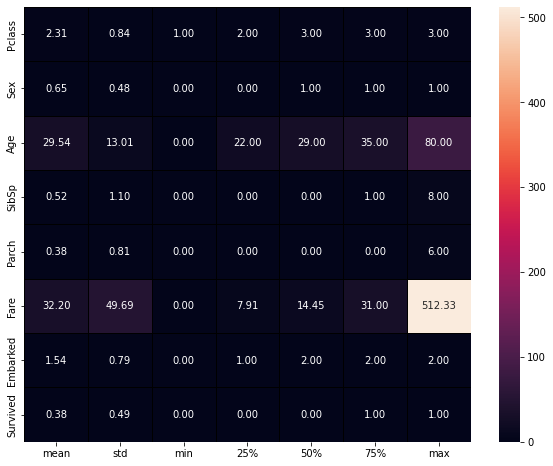

In [64]:
plt.figure(figsize = (10,8))
sns.heatmap(df_new.describe()[1:].transpose()[1:], fmt = ".2f", linecolor='black', linewidths='1', annot = True)

### Removing Outliers from the dataset


In [42]:
from scipy.stats import zscore

In [43]:
from scipy.stats import zscore

z = np.abs(zscore(df_new))



df_z = df_new[(z<3).all(axis = 1)]

In [44]:
print(df_z.shape)  #(820, 9)
print(df_new.shape)  #(891, 9)

(820, 9)
(891, 9)


## Percentage of Data Loss

In [45]:
print("Percentage of data loss", (891-820)/891*100)

Percentage of data loss 7.968574635241302


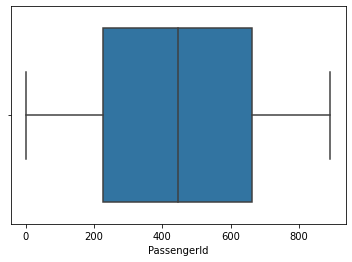

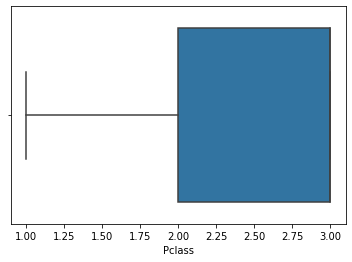

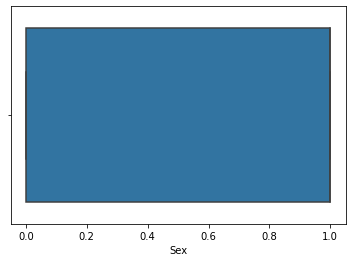

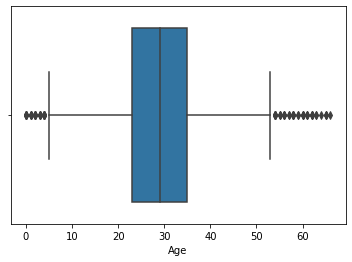

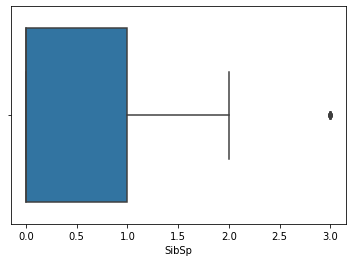

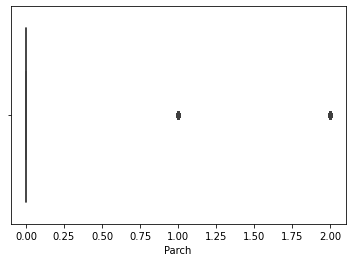

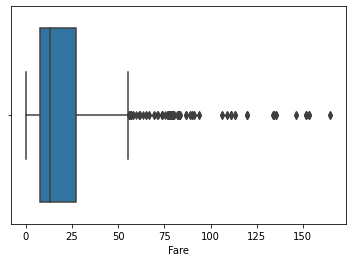

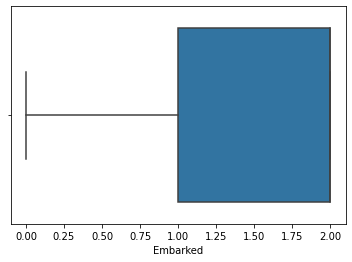

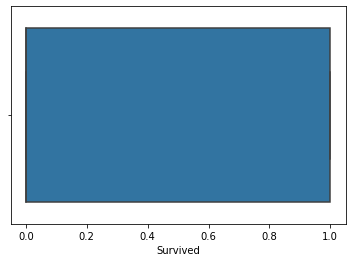

In [46]:
for i in df_z.columns:
    plt.figure()
    sns.boxplot(df_z[i])

### From visually we find that still outliers are present in the dataset

### Hence using interquartile range to remove outliers

In [47]:
Q1 = df_new.quantile(0.25)
Q3 = df_new.quantile(0.75)
IQR = Q3 - Q1

In [48]:
df_IQR = df_new[ ~( (df_new < (Q1 - 1.5*IQR)) | (df_new > (Q3 + 1.5*IQR )) ).any(axis = 1) ]
print(df_IQR.shape)

(577, 9)


In [49]:
print("Percentage of data loss", (891-579)/891*100)

Percentage of data loss 35.01683501683502


## With interquartile range data loss is much higher hence we are considering Z score method for outlier removal

#### 

## Dividing data for feature selection

In [50]:
x = df_z.iloc[:,:-1]
y = df_z.iloc[:,-1]

In [51]:
print('shape of x', x.shape)
print('Shape of y', y.shape)

shape of x (820, 8)
Shape of y (820,)


# Removing Skewness

In [52]:
from sklearn.preprocessing import power_transform
skew_x = power_transform(x)

In [53]:
skew_data = pd.DataFrame(skew_x, columns = x.columns)
skew_data.skew()

PassengerId   -0.279863
Pclass        -0.429718
Sex           -0.664152
Age            0.075436
SibSp          0.948944
Parch          1.581505
Fare          -0.018602
Embarked      -1.073724
dtype: float64

In [54]:
skew_data['Pclass'] = 1 - skew_data['Pclass']
skew_data['Sex'] = 1 - skew_data['Sex']
skew_data['Fare'] = 1 - skew_data['Fare']
skew_data['Embarked'] = 1 - skew_data['Embarked']

### Making positive skewness

In [55]:
skew_data.skew()  

PassengerId   -0.279863
Pclass         0.429718
Sex            0.664152
Age            0.075436
SibSp          0.948944
Parch          1.581505
Fare           0.018602
Embarked       1.073724
dtype: float64

<Figure size 432x288 with 0 Axes>

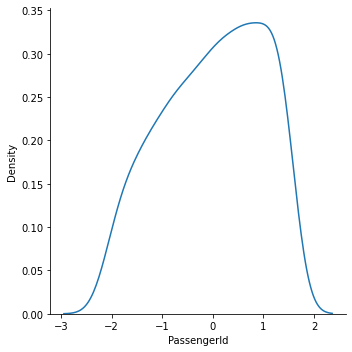

<Figure size 432x288 with 0 Axes>

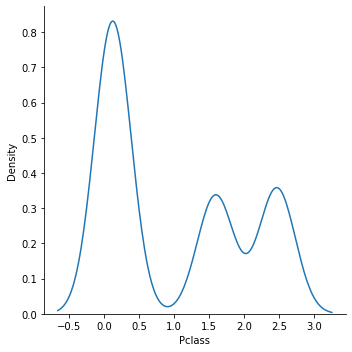

<Figure size 432x288 with 0 Axes>

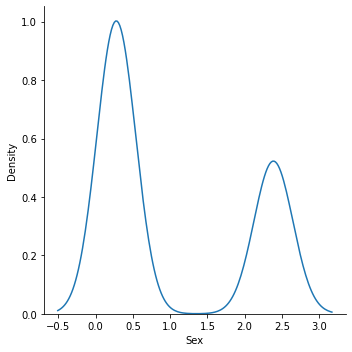

<Figure size 432x288 with 0 Axes>

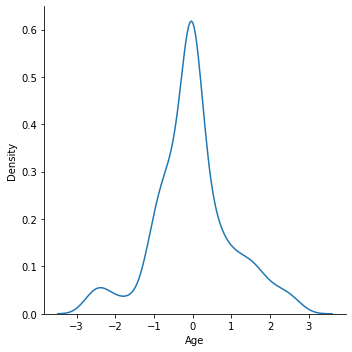

<Figure size 432x288 with 0 Axes>

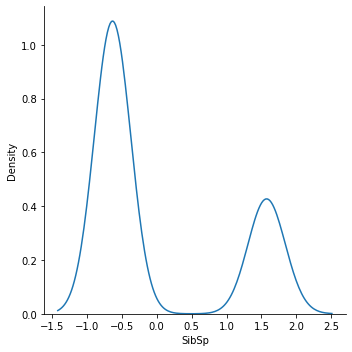

<Figure size 432x288 with 0 Axes>

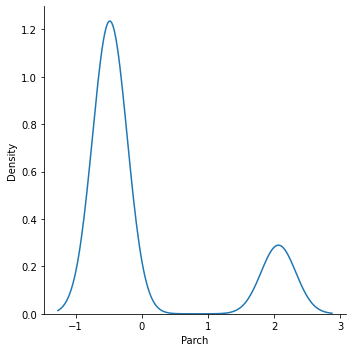

<Figure size 432x288 with 0 Axes>

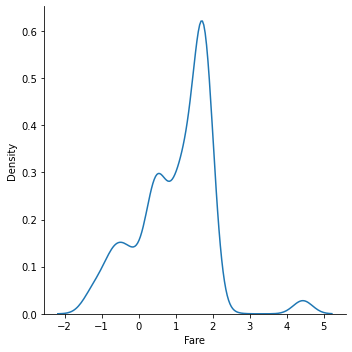

<Figure size 432x288 with 0 Axes>

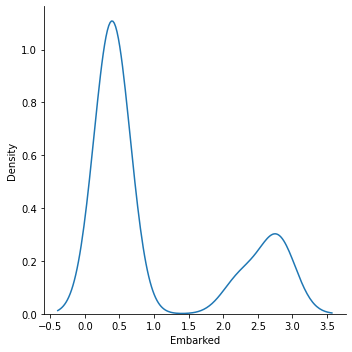

In [56]:
for i in skew_data.columns:
    plt.figure()
    sns.displot(skew_data[i], kind = 'kde')

## Checking multicolinearity of the dataset

In [57]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [58]:
def calc_vif(x):
    
    vif = pd.DataFrame()
    vif['Variance'] = skew_data.columns
    vif["VIF Factor"] = [variance_inflation_factor(skew_data.values, i) for i in range(skew_data.shape[1])]
    return vif

In [59]:
calc_vif(skew_data)

,Variance,VIF Factor
0,PassengerId,1.010546
1,Pclass,1.850133
2,Sex,2.034366
3,Age,1.228242
4,SibSp,1.272132
5,Parch,1.316893
6,Fare,1.588941
7,Embarked,1.803185


### From above code we find that there is no multicollinearity present in the dataset

# Sythetic Minority Oversampling Technique

In [60]:
x = skew_data

In [61]:
from imblearn.over_sampling import SMOTE

In [62]:
sm = SMOTE()
x, y = sm.fit_resample(x, y)

In [63]:
print(x.shape)
print(y.shape)

(1000, 8)
(1000,)


0    500
1    500
Name: Survived, dtype: int64


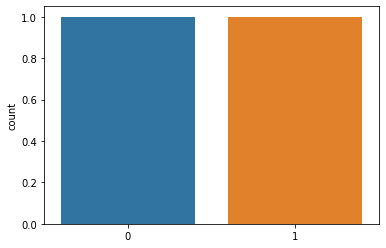

In [64]:
sns.countplot(y.unique())
print(y.value_counts())

# Scaling dataset

In [65]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaler = sc.fit_transform(x)

In [66]:
x = x_scaler

# Feature Selection 

### Since output variables having boolean variables hence we use classification model

In [67]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [68]:
class best_model:
    def best_fit(x, y, model):
        random_state_values = []
        for i in range(0,200):
            x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = i, test_size = 0.20)
            model.fit(x_train, y_train)
            pred_train = model.predict(x_train)
            pred_test = model.predict(x_test)

            if round(accuracy_score(y_train, pred_train)*100,1) == round(accuracy_score(y_test, pred_test)*100,1):
                print("At random_state:-", i)
                print("Training accuracy_score is:-", accuracy_score(pred_train, y_train)*100)
                print("Testing accuracy_score is:-", accuracy_score(pred_test, y_test)*100)
                print("\n")
                random_state_values.append(i)
        print("Best fit random_state_values", random_state_values)
    
    
    def final_model(x, y, model, i):
        global var
        
        var = i
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = i)
        model.fit(x_train, y_train)
        pred_train = model.predict(x_train)
        pred_test = model.predict(x_test)
        print("At random state", i , "model giving best accuracy score","\n")
        Train_accuracy = accuracy_score(pred_train, y_train)
        Test_accuracy = accuracy_score(pred_test, y_test)
        print('Training accuracy:- ', Train_accuracy*100)
        print('Testing accuracy:- ', Test_accuracy*100)
        print("\n")
        print('--------------------------------------')
        print('Confusion Matrix')
        print(confusion_matrix(pred_test, y_test) )
        print("\n")
        print('Classification Report')
        print(classification_report(pred_test, y_test) )
        

    def cross_val_score(model, x, y):
        for value in range(2,8):
            cv = cross_val_score(model, x, y, cv = value).mean()
            x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = var)
            model.fit(x_train, y_train)
            pred_test = model.predict(x_test)
            Test_accuracy = accuracy_score(pred_test, y_test)
            print('cross_val_score', cv*100,'at cv =', value,"with model accuracy score ", Test_accuracy*100,"\n")


# Model 1 Logisitc Regression

In [69]:
model = LogisticRegression()

In [70]:
best_model.best_fit(x, y, model)

At random_state:- 101
Training accuracy_score is:- 79.0
Testing accuracy_score is:- 79.0


At random_state:- 115
Training accuracy_score is:- 79.0
Testing accuracy_score is:- 79.0


At random_state:- 176
Training accuracy_score is:- 79.0
Testing accuracy_score is:- 79.0


Best fit random_state_values [101, 115, 176]


In [73]:
best_model.final_model(x, y, model, 176) # model show best accuracy score at 176

At random state 176 model giving best accuracy score 

Training accuracy:-  79.0
Testing accuracy:-  79.0


--------------------------------------
Confusion Matrix
[[72 22]
 [20 86]]


Classification Report
              precision    recall  f1-score   support

           0       0.78      0.77      0.77        94
           1       0.80      0.81      0.80       106

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.79       200
weighted avg       0.79      0.79      0.79       200



In [74]:
best_model.cross_val_score(model, x, y)

cross_val_score 64.4 at cv = 2 with model accuracy score  79.0 

cross_val_score 72.8009446572321 at cv = 3 with model accuracy score  79.0 

cross_val_score 75.50000000000001 at cv = 4 with model accuracy score  79.0 

cross_val_score 75.9 at cv = 5 with model accuracy score  79.0 

cross_val_score 76.80482408676622 at cv = 6 with model accuracy score  79.0 

cross_val_score 77.29875758044773 at cv = 7 with model accuracy score  79.0 



# Model 2 KNeighborClassifier

In [75]:
model = KNeighborsClassifier()

In [76]:
best_model.best_fit(x, y, model)

Best fit random_state_values []


#### No best fit value find for KNeighbor classifiers

## Hyper Parameter Tuning for DTC criterion

In [94]:
# using hyper parameter tuning for decision tree regressor to find out best criterion


model = DecisionTreeClassifier()
param = {'criterion': ['gini', 'entropy'], "splitter": ['best','random'],
    "min_samples_split": [1,2,3],
    "min_samples_leaf": [1,2,3],}

gd = GridSearchCV(model, param_grid=param)
gd.fit(x, y)
gd.best_params_


{'criterion': 'gini',
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'splitter': 'random'}

# Model 3 Decision Tree Classifier

In [96]:
model = DecisionTreeClassifier(criterion = 'gini', min_samples_leaf=3,min_samples_split=3, splitter='random')

In [97]:
best_model.best_fit(x, y, model)

Best fit random_state_values []


### No best fit value find for Decision Tree Classifier

#### 

## Hyper Parameter Tuning for Support Vector Classifiers¶

In [80]:
model = SVC()
param = {'kernel': ['linear', 'rbf', 'poly']}

gd = GridSearchCV(model, param_grid=param)
gd.fit(x, y)
gd.best_params_


# {'kernel': 'rbf'}

{'kernel': 'rbf'}

## Model 4 Support Vector Classifier

In [81]:
model = SVC(kernel = 'rbf')

In [82]:
best_model.best_fit(x, y, model)

At random_state:- 52
Training accuracy_score is:- 83.5
Testing accuracy_score is:- 83.5


At random_state:- 79
Training accuracy_score is:- 82.5
Testing accuracy_score is:- 82.5


At random_state:- 129
Training accuracy_score is:- 82.5
Testing accuracy_score is:- 82.5


Best fit random_state_values [52, 79, 129]


In [84]:
best_model.final_model(x, y, model, 52)  # model show best accuracy score at 52

At random state 52 model giving best accuracy score 

Training accuracy:-  83.5
Testing accuracy:-  83.5


--------------------------------------
Confusion Matrix
[[88 17]
 [16 79]]


Classification Report
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       105
           1       0.82      0.83      0.83        95

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.84      0.83      0.84       200



In [85]:
best_model.cross_val_score(model, x, y)

cross_val_score 62.3 at cv = 2 with model accuracy score  83.5 

cross_val_score 73.00354246462031 at cv = 3 with model accuracy score  83.5 

cross_val_score 80.60000000000001 at cv = 4 with model accuracy score  83.5 

cross_val_score 80.19999999999999 at cv = 5 with model accuracy score  83.5 

cross_val_score 81.00365533992257 at cv = 6 with model accuracy score  83.5 

cross_val_score 80.39917828650223 at cv = 7 with model accuracy score  83.5 




## Hyper Parameter Tuning for Stocastic Descent Classifiers to minimize cost function


In [115]:
model = SGDClassifier()
param = {'alpha': [0.1,.01,.001], 'penalty': ["l1", "l2", "elasticnet"]}

gd = GridSearchCV(model, param_grid=param)
gd.fit(x, y)
gd.best_params_

{'alpha': 0.001, 'penalty': 'elasticnet'}

## Model 5 SGD Classifier

In [118]:
model = SGDClassifier(alpha = 0.001, penalty= 'elasticnet')

In [119]:
best_model.best_fit(x, y, model)

At random_state:- 15
Training accuracy_score is:- 77.0
Testing accuracy_score is:- 77.0


At random_state:- 30
Training accuracy_score is:- 79.0
Testing accuracy_score is:- 79.0


Best fit random_state_values [15, 30]


In [123]:
best_model.final_model(x, y, model, 30)  # model show best accuracy score at 30

At random state 30 model giving best accuracy score 

Training accuracy:-  79.125
Testing accuracy:-  79.0


--------------------------------------
Confusion Matrix
[[90 31]
 [11 68]]


Classification Report
              precision    recall  f1-score   support

           0       0.89      0.74      0.81       121
           1       0.69      0.86      0.76        79

    accuracy                           0.79       200
   macro avg       0.79      0.80      0.79       200
weighted avg       0.81      0.79      0.79       200



In [124]:
best_model.cross_val_score(model, x, y)

cross_val_score 66.8 at cv = 2 with model accuracy score  77.0 

cross_val_score 74.8026469583356 at cv = 3 with model accuracy score  75.5 

cross_val_score 77.0 at cv = 4 with model accuracy score  80.0 

cross_val_score 78.5 at cv = 5 with model accuracy score  79.0 

cross_val_score 78.10764014140395 at cv = 6 with model accuracy score  77.0 

cross_val_score 78.00087236706955 at cv = 7 with model accuracy score  77.5 



# From above 5 Models trainig testing we conclude that SGD Classifiers shows good accuracy score with minimum negative ratio of classification matrix then rest all models

In [100]:
model = SGDClassifier(alpha = 0.01)

In [126]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 30)
model.fit(x_train, y_train)
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)
print("At random state", i , "model giving best accuracy score","\n")
Train_accuracy = accuracy_score(pred_train, y_train)
Test_accuracy = accuracy_score(pred_test, y_test)
print('Training accuracy:- ', Train_accuracy*100)
print('Testing accuracy:- ', Test_accuracy*100)
print("\n")
print('--------------------------------------')
print('Confusion Matrix')
print(confusion_matrix(pred_test, y_test) )
print("\n")
print('Classification Report')
print(classification_report(pred_test, y_test) )   # at random state 105 model shows best accuracy

At random state Embarked model giving best accuracy score 

Training accuracy:-  77.75
Testing accuracy:-  77.5


--------------------------------------
Confusion Matrix
[[90 34]
 [11 65]]


Classification Report
              precision    recall  f1-score   support

           0       0.89      0.73      0.80       124
           1       0.66      0.86      0.74        76

    accuracy                           0.78       200
   macro avg       0.77      0.79      0.77       200
weighted avg       0.80      0.78      0.78       200



In [127]:
cv = cross_val_score(model, x, y, cv = 6).mean()
print('cross_val_score', cv*100,'at cv =', 6  )

cross_val_score 77.80823894379915 at cv = 6


# AUC ROC Curve

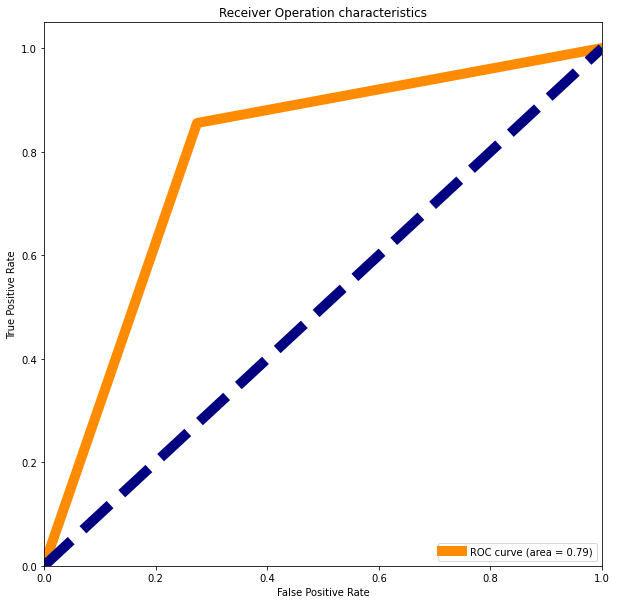

In [128]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresolds = roc_curve(pred_test, y_test)
roc_auc = auc(fpr, tpr)

plt.figure(figsize = (10,10))
plt.plot(fpr, tpr, color = 'darkorange', lw = 10, label = "ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0,1],[0,1], color = 'navy', lw = 10, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operation characteristics")
plt.legend(loc = "lower right")
plt.show()

### Deploy Model

In [129]:
import pickle

filename = "titanic.pkl"
pickle.dump(model, open(filename, 'wb'))

### Loading Model

In [130]:
load = pickle.load(open('titanic.pkl', 'rb'))
result = load.score(x_test, y_test)
print(result)

0.775


### Conclusion

In [131]:
conclusion = pd.DataFrame()
conclusion['Predicted Survived Passengers'] = np.array(model.predict(x_test))
conclusion['Actual Survived Passengers'] = np.array(y_test)

In [132]:
pd.set_option('display.max_rows', None)
conclusion

,Predicted Survived Passengers,Actual Survived Passengers
0,1,1
1,1,1
2,1,1
3,1,1
4,0,1
5,1,0
6,0,0
7,0,0
8,0,1
9,0,0
